# Hurricane Track Editor

Quick notebook to edit hurricane tracks to target specific regions

In [59]:
import sys
sys.path.append('/mnt/Work/LaGonaveFM/') # or use path '/home/aesgeorges/LaGonaveFM/scripts/'
from codebase.tools import *

import pandas as pd

import cmocean
import numpy as np
import netCDF4 as netcdf
import matplotlib.pyplot as plt
from tqdm import tqdm
import cartopy.crs as ccrs
import matplotlib as mpl

In [60]:
root = '../sims/Matthew16_base_v0/'
root_mod = '../sims/Matthew16_base_v0b/'
fort22path_base = root + 'fort.22'
fort22path_mod = root_mod + 'fort.22'

In [61]:
df = pd.read_csv(fort22path_base, header=None)

lat = 0.1 * df[6].str.strip().str.replace('N', '', regex=False).astype(float)
lon = -0.1 * df[7].str.strip().str.replace('W', '', regex=False).astype(float)

times = df[2]

FileNotFoundError: [Errno 2] No such file or directory: '../sims/Matthew16_base_v0/fort.22'

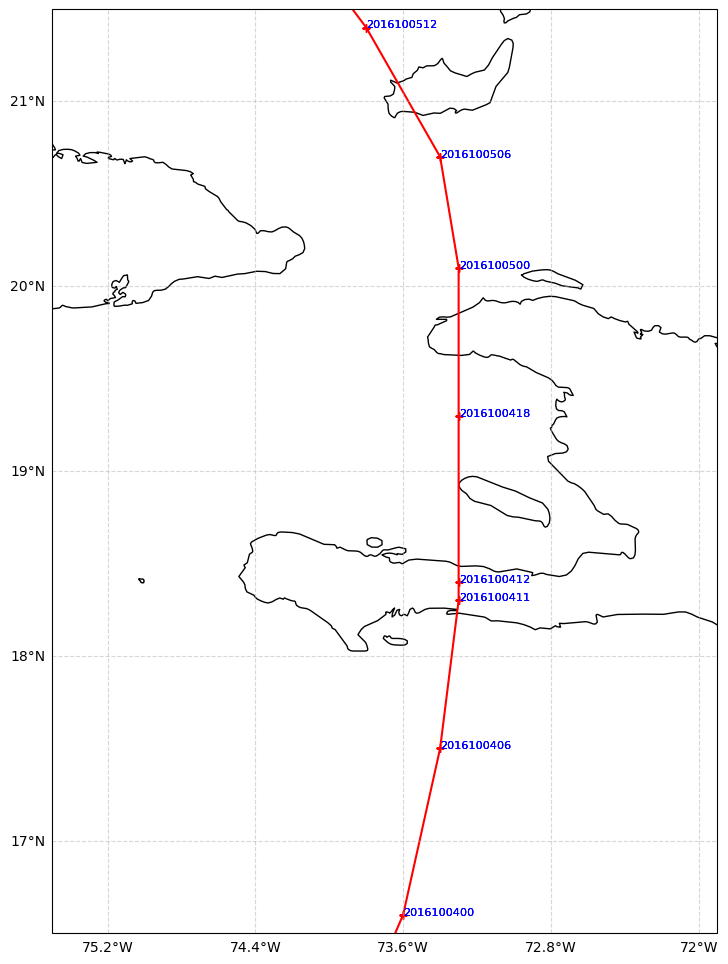

In [62]:
fig, ax = plt.subplots(figsize=(14,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='red', marker='+')
ax.coastlines()

for x, y, t in zip(lon, lat, times):
    ax.text(x, y, str(t), transform=ccrs.PlateCarree(), fontsize=8, color='blue', clip_on=True)

ax.set_extent([-75.5, -71.9, 16.5, 21.5])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mpl.ticker.MaxNLocator(nbins=5)
gl.ylocator = mpl.ticker.MaxNLocator(nbins=5)

In [63]:
df_mod = pd.read_csv(fort22path_mod, header=None)

lat_mod = 0.1 * df_mod[6].str.strip().str.replace('N', '', regex=False).astype(float)
lon_mod = -0.1 * df_mod[7].str.strip().str.replace('W', '', regex=False).astype(float)

times_mod = df_mod[2]

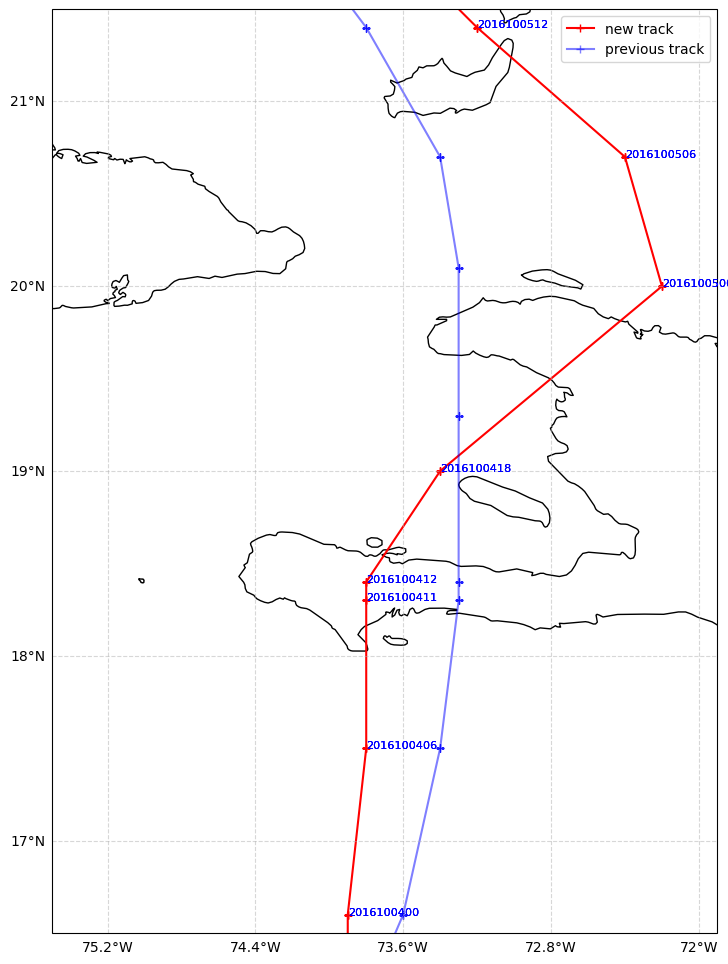

In [68]:
fig, ax = plt.subplots(figsize=(14,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(lon_mod, lat_mod, transform=ccrs.PlateCarree(), color='red', marker='+', label='new track')
ax.plot(lon, lat, transform=ccrs.PlateCarree(), alpha=0.5, color='blue', marker='+', label='previous track')
ax.legend()
ax.coastlines()

for x, y, t in zip(lon_mod, lat_mod, times_mod):
    ax.text(x, y, str(t), transform=ccrs.PlateCarree(), fontsize=8, color='blue', clip_on=True)

ax.set_extent([-75.5, -71.9, 16.5, 21.5])


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mpl.ticker.MaxNLocator(nbins=5)
gl.ylocator = mpl.ticker.MaxNLocator(nbins=5)